## GPU vs CPU Performance using Tensorflow<br><br>

> `Hardware specification`:<br>

|Device|Maker|Model|
|:---:|:---:|:---:|
|**GPU**|_NVIDIA_|_GTX 1050Ti_|
|**CPU**|_Intel_|_i7 8th Gen_|
<br>
<br>
<br>
> `Environment specification`:<br>

|Envs|Version|
|:---:|:---:|
|**OS**|_windows 10_|
|**Anaconda**|_conda 4.6.7_|
|**Python**|_python 3.6.5_|
|**CUDA**|_cuda 10.0_|
|**cuDNN**|_cuDNN 7.5_|
|**Tensorflow**|_tensorflow-gpu 1.12.0_|
<br>
<br>

In [21]:
import tensorflow as tf
import time

In [22]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)   

In [23]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [24]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [25]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [26]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [27]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 2.490124225616455
/cpu:0  size= 100 Time: 2.5819900035858154


In [28]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)

/gpu:0  size= 1000 Time: 2.670898199081421
/cpu:0  size= 1000 Time: 2.6419055461883545


In [29]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)

/gpu:0  size= 5000 Time: 2.839442253112793
/cpu:0  size= 5000 Time: 4.825198650360107


In [30]:
g=performanceTest("/gpu:0",7000)
c=performanceTest("/cpu:0",7000)

/gpu:0  size= 7000 Time: 3.1887106895446777
/cpu:0  size= 7000 Time: 8.37363314628601


In [31]:
g=performanceTest("/gpu:0",9000)
c=performanceTest("/cpu:0",9000)

/gpu:0  size= 9000 Time: 3.731050491333008
/cpu:0  size= 9000 Time: 14.69871473312378


In [32]:
g=performanceTest("/gpu:0",10000)
c=performanceTest("/cpu:0",10000)

/gpu:0  size= 10000 Time: 4.276898145675659
/cpu:0  size= 10000 Time: 17.725707292556763


#### Generate 0~9k matrix computations, print every 1000 computations.

In [33]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,9001,1000):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 3.0908892154693604
/cpu:0  size= 0 Time: 3.1419012546539307
--
/gpu:0  size= 1000 Time: 3.2802343368530273
/cpu:0  size= 1000 Time: 3.3924858570098877
--
/gpu:0  size= 2000 Time: 3.353839159011841
/cpu:0  size= 2000 Time: 3.517245054244995
--
/gpu:0  size= 3000 Time: 3.5472779273986816
/cpu:0  size= 3000 Time: 3.9737608432769775
--
/gpu:0  size= 4000 Time: 3.7543892860412598
/cpu:0  size= 4000 Time: 5.0125720500946045
--
/gpu:0  size= 5000 Time: 3.9413857460021973
/cpu:0  size= 5000 Time: 5.621570825576782
--
/gpu:0  size= 6000 Time: 4.099165916442871
/cpu:0  size= 6000 Time: 6.978004455566406
--
/gpu:0  size= 7000 Time: 4.421580791473389
/cpu:0  size= 7000 Time: 9.037789821624756
--
/gpu:0  size= 8000 Time: 4.723394393920898
/cpu:0  size= 8000 Time: 11.572550058364868
--
/gpu:0  size= 9000 Time: 5.092491626739502
/cpu:0  size= 9000 Time: 14.889055728912354
--


#### Plot time consumer GPU vs CPU.

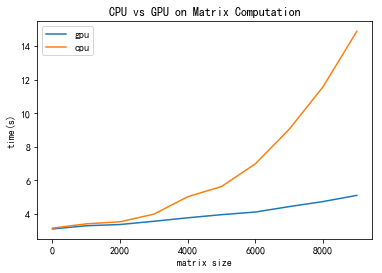

In [35]:
%matplotlib inline
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.title('CPU vs GPU on Matrix Computation')
plt.ylabel('time(s)')
plt.xlabel('matrix size')
plt.legend()